# Problem Statement:
Project Overview: The Loan Classification project is designed to help you understand and apply machine learning techniques to classify loan applicants based on their likelihood of loan repayment. This project will give you hands-on experience in data preprocessing, feature engineering, model training, evaluation, and interpretation. Data = "loan_detection.csv"

## Steps:
1. EDA (Cleaning)
2. separate dependent and independent features
3. split data into training and test set
4. Model building 
5. Model prediction 
6. model evaluation 

## Basic EDA Steps:
1. Missing data
2. duplicate data
3. outliers/anomalies
4. data visualisation
5. feature encoding (categorical data to numerical)
6. feature selection

## Model Building steps:
1. Separate dependent and independent data
2. split into train and test set
3. model selection
4. model training
5. model evaluation

# Step1: Loading Libraries and dataset

In [4]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('loan_detection.csv')
df.head()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


# Step2: Basic EDA (Exploratory Data Analysis)

In [12]:
df.shape

(41188, 60)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [16]:
df.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Balanced or imbalanced data

In [30]:
df['Loan_Status_label'].value_counts()

Loan_Status_label
0    34179
1     4592
Name: count, dtype: int64

In [32]:
# This is imbalanced data, but we don't need to balance it since this is banking data (sensitive) so we need to consider each datapoint.

In [34]:
df[df['Loan_Status_label']==0]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,2,999,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41182,29,1,9,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [36]:
df[df['Loan_Status_label']==1]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
75,41,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
83,49,1,999,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
88,49,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
129,41,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
139,45,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41173,62,1,999,2,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
41174,62,1,1,6,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
41178,62,2,6,3,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


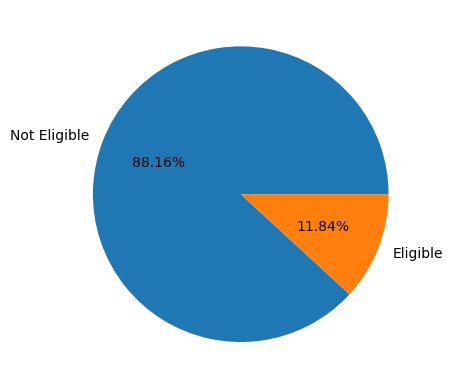

In [39]:
plt.pie(df['Loan_Status_label'].value_counts(),autopct='%1.2f%%', labels = ['Not Eligible','Eligible'])
plt.show()

## Missing data

In [10]:
df.isna().sum() # no missing values

age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university

## Duplicate data

In [20]:
df.duplicated().sum()

2417

In [24]:
# Deleting duplicates
df.drop_duplicates(keep = 'first', inplace=True) #drop all duplicates except the first entry

In [26]:
df.duplicated().sum()

0

## Outliers/Anomalies
- since this is sensitive data, no need to remove outliers since we cannot delete bank records

# Data visualisation

age


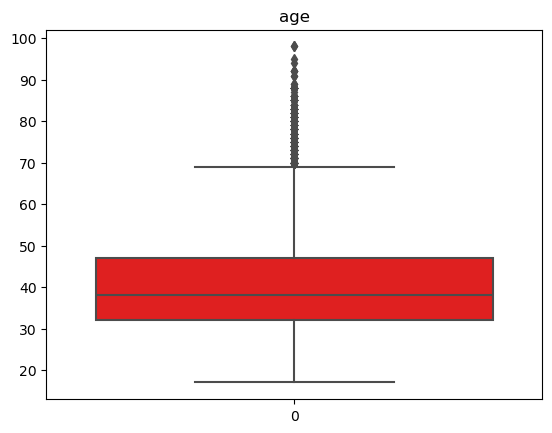

campaign


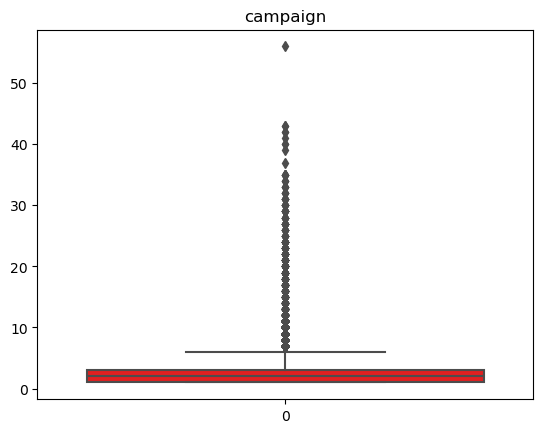

pdays


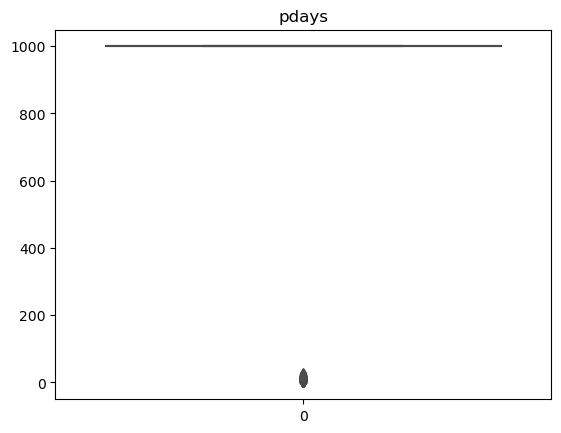

previous


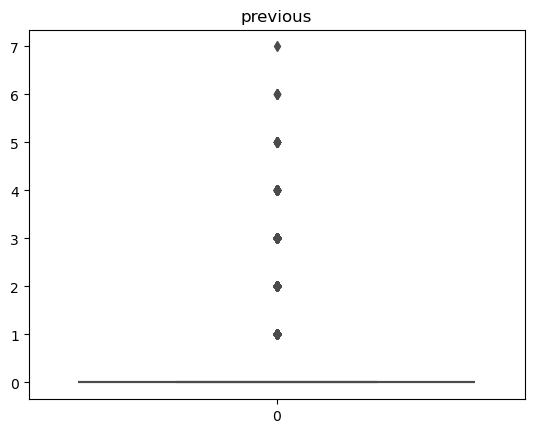

no_previous_contact


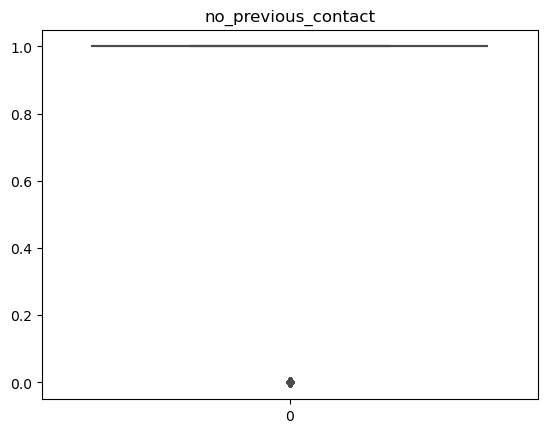

not_working


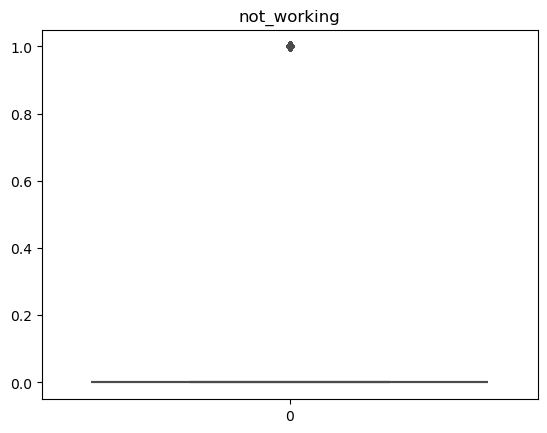

job_admin.


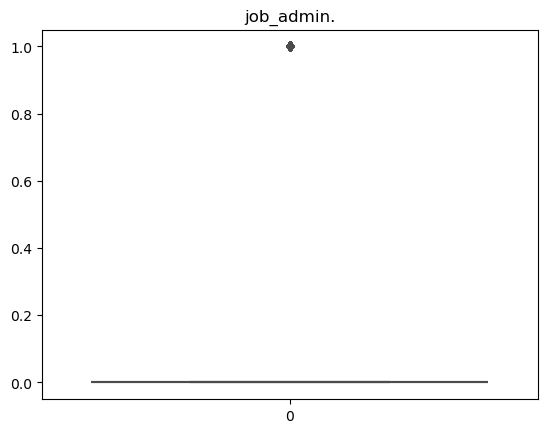

job_blue-collar


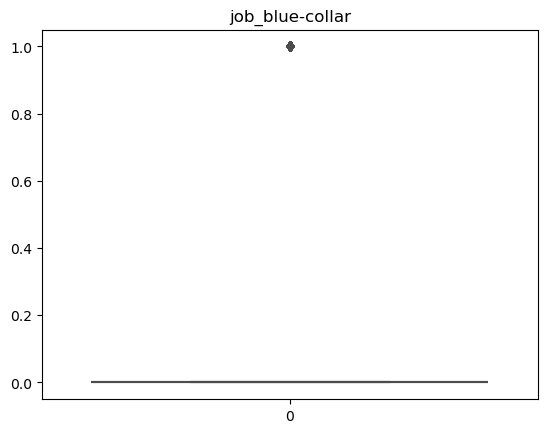

job_entrepreneur


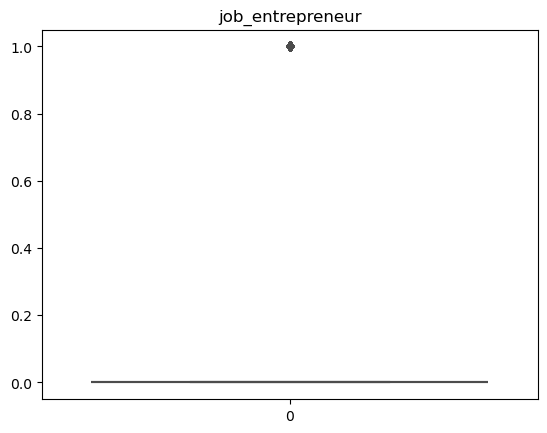

job_housemaid


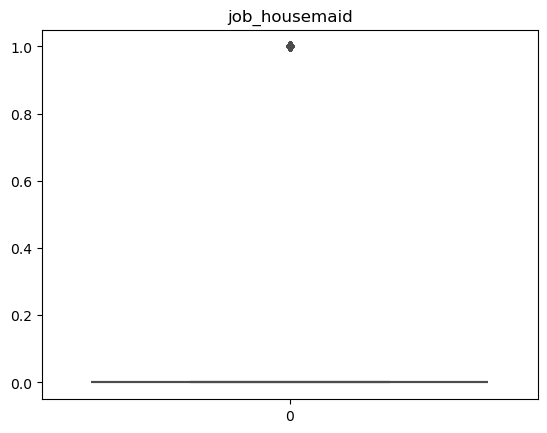

job_management


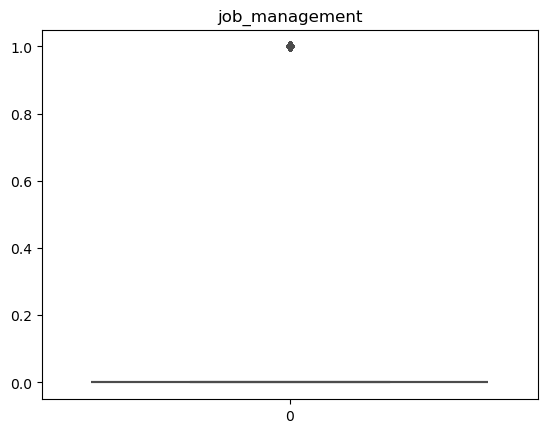

job_retired


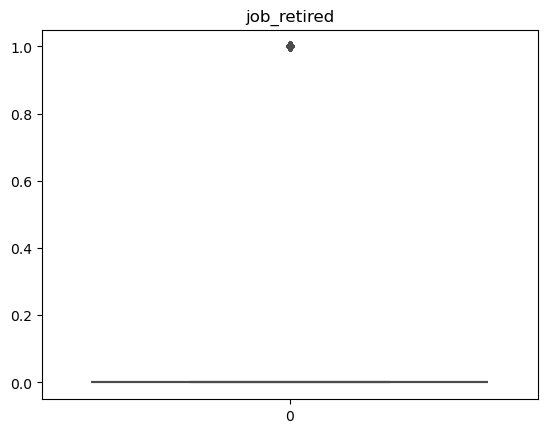

job_self-employed


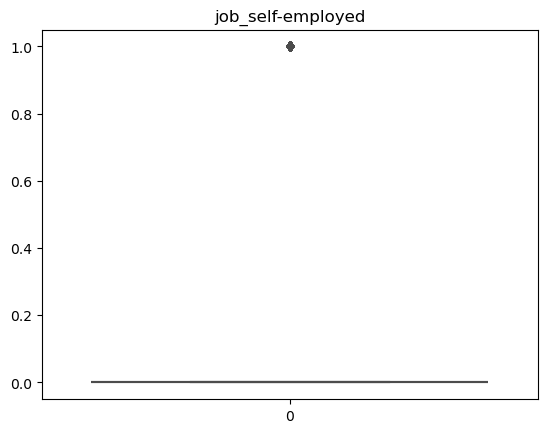

job_services


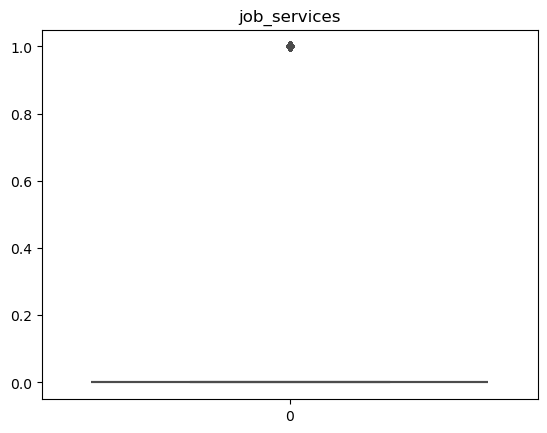

job_student


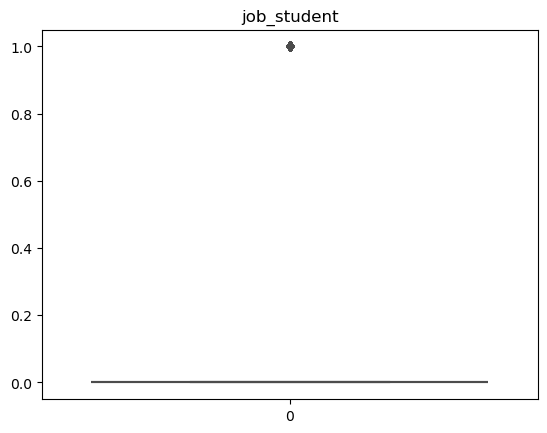

job_technician


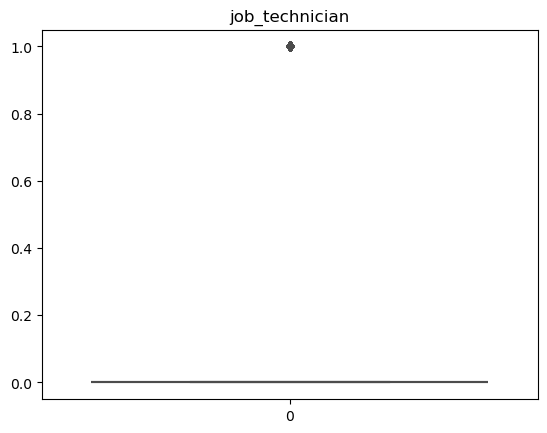

job_unemployed


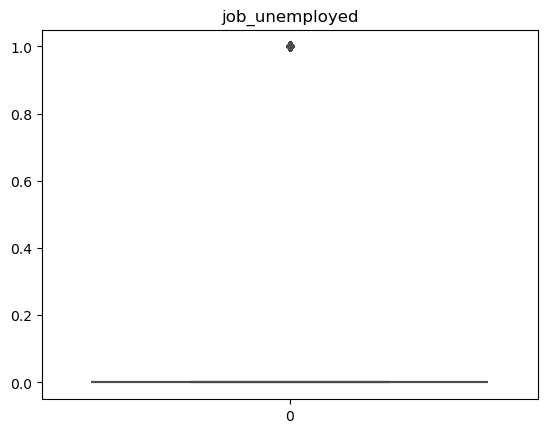

job_unknown


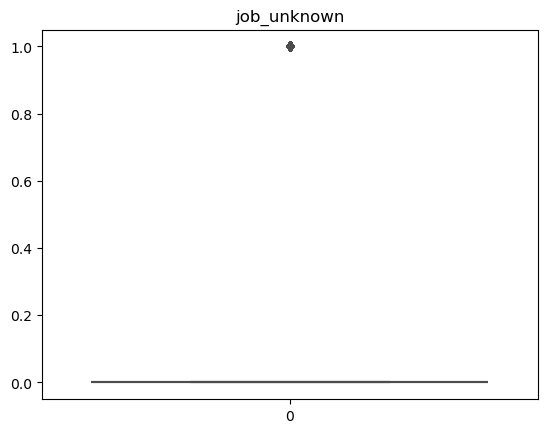

marital_divorced


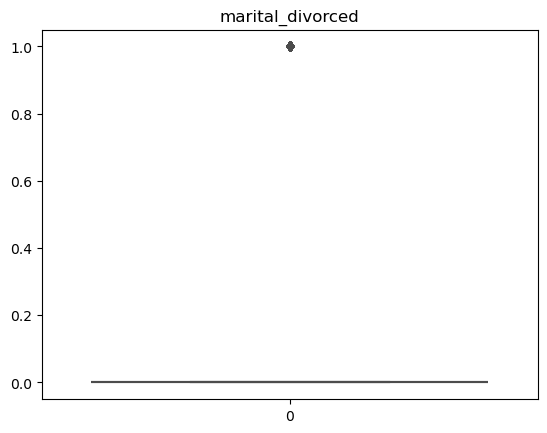

marital_married


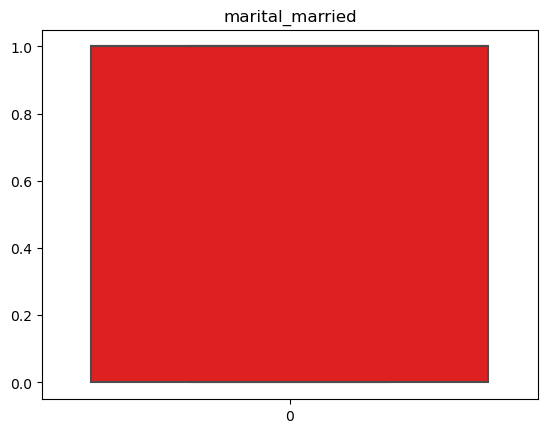

marital_single


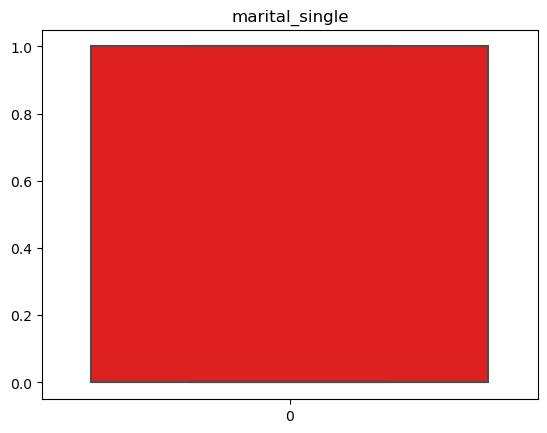

marital_unknown


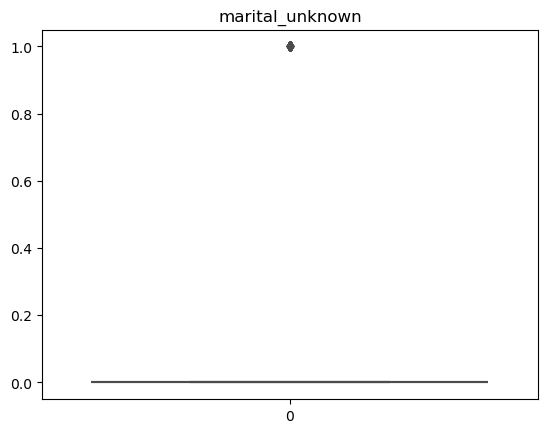

education_basic.4y


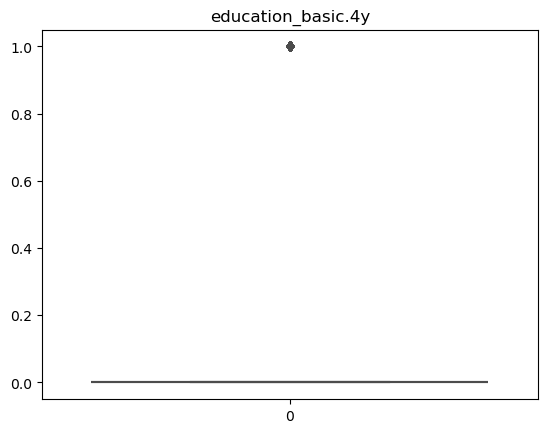

education_basic.6y


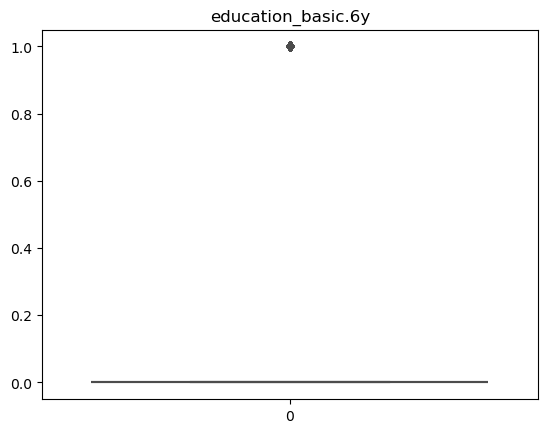

education_basic.9y


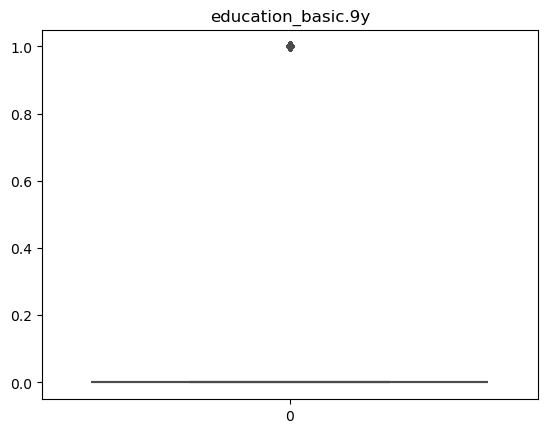

education_high.school


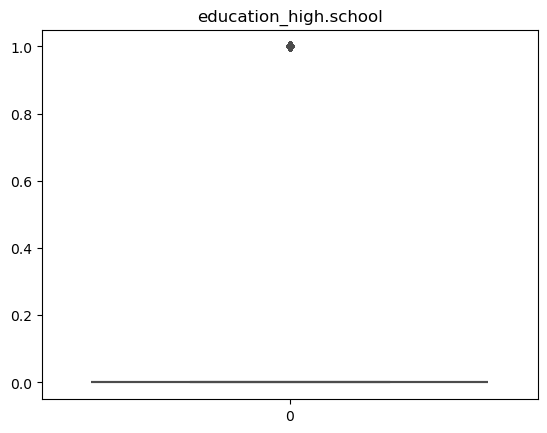

education_illiterate


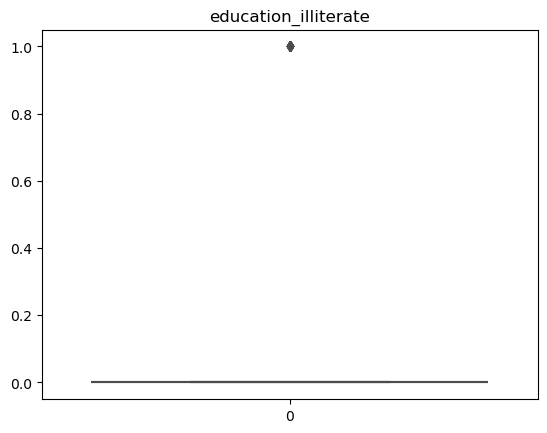

education_professional.course


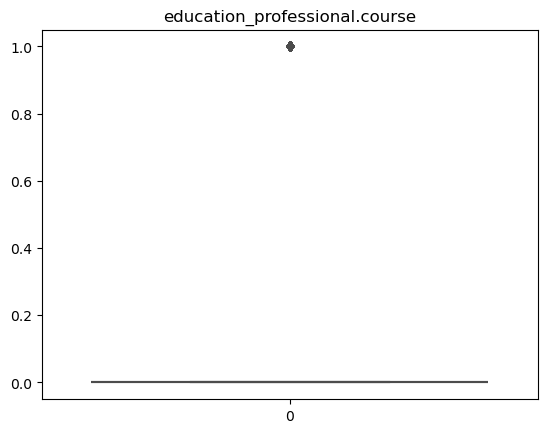

education_university.degree


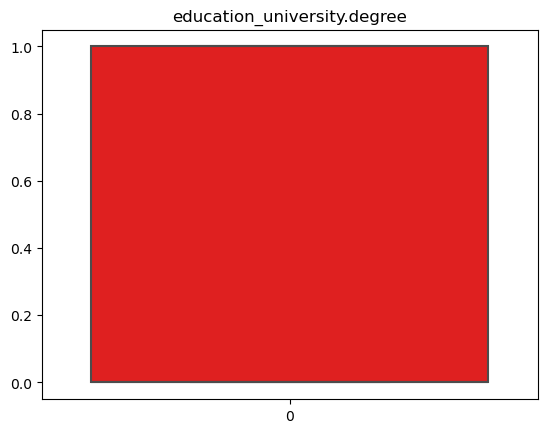

education_unknown


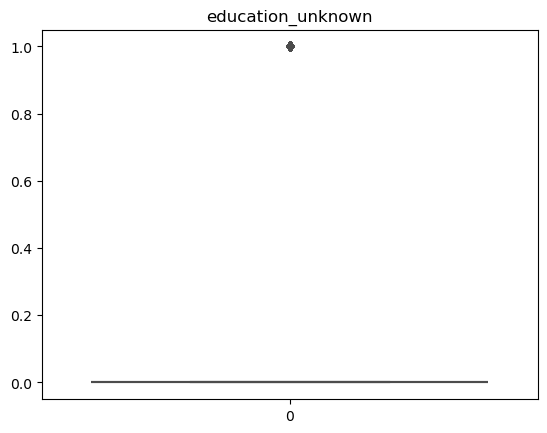

default_no


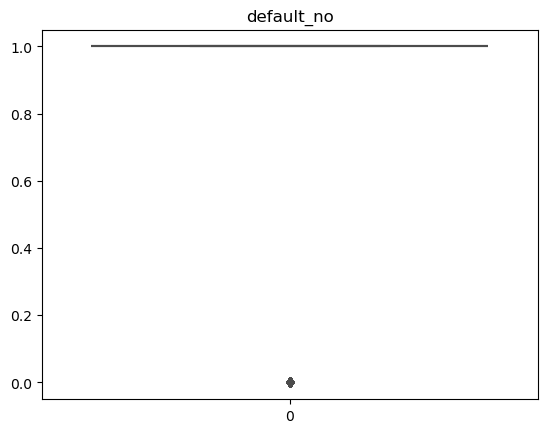

default_unknown


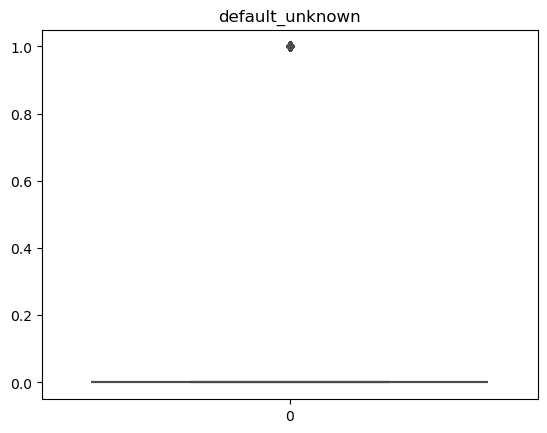

default_yes


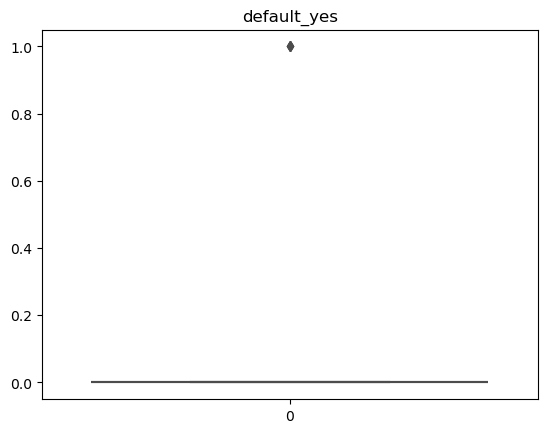

housing_no


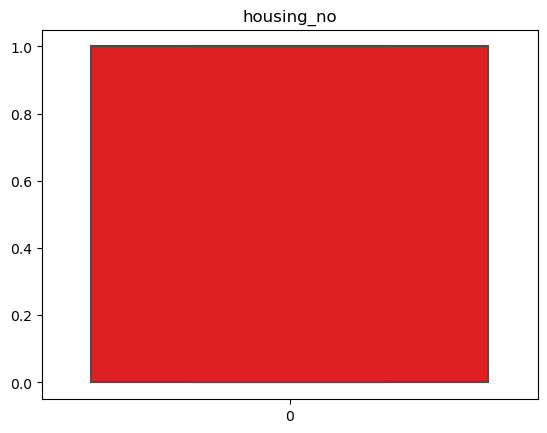

housing_unknown


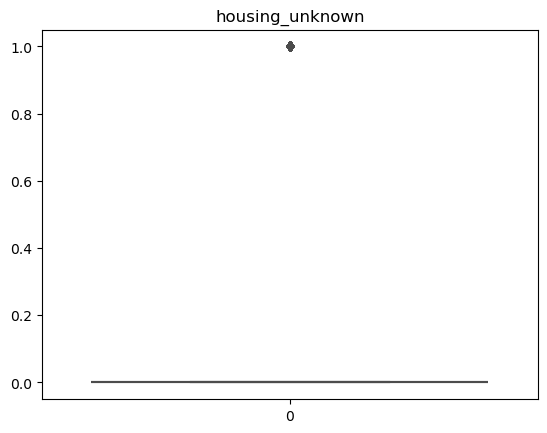

housing_yes


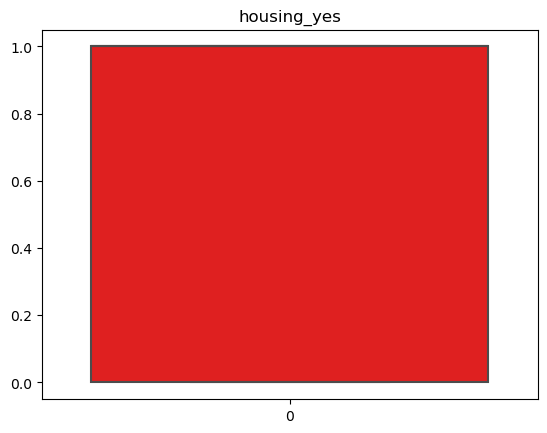

loan_no


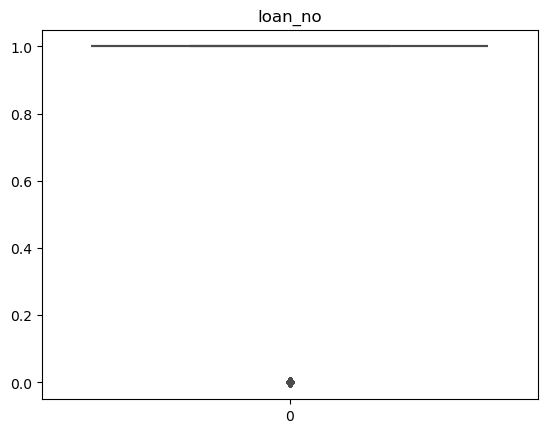

loan_unknown


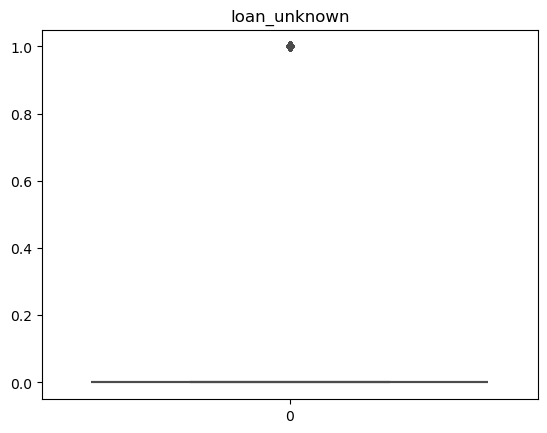

loan_yes


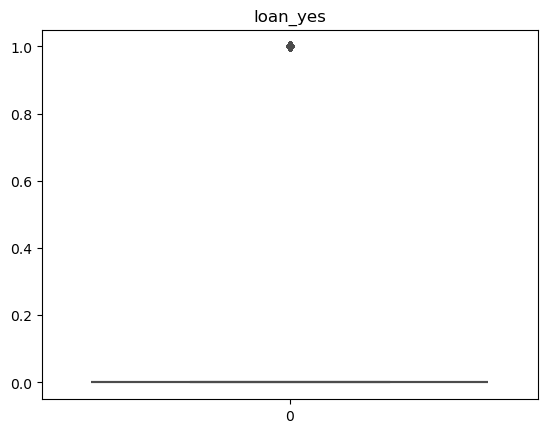

contact_cellular


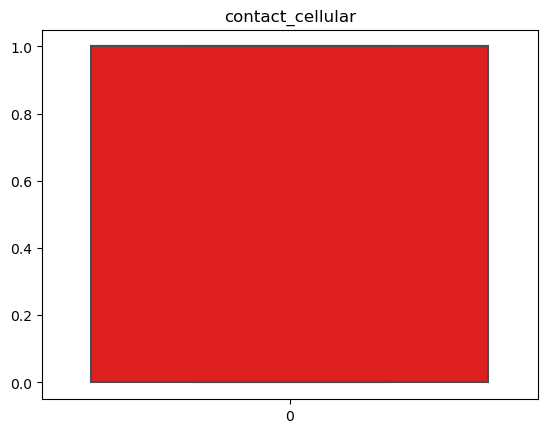

contact_telephone


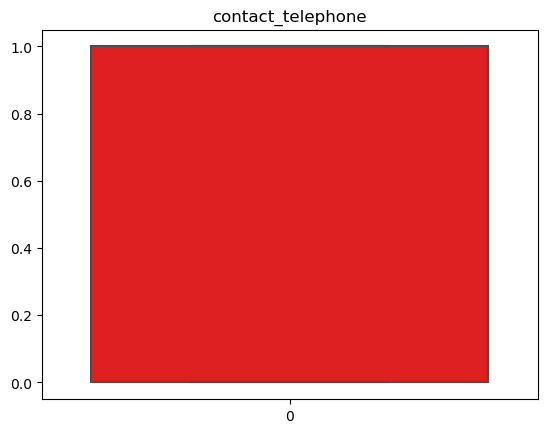

month_apr


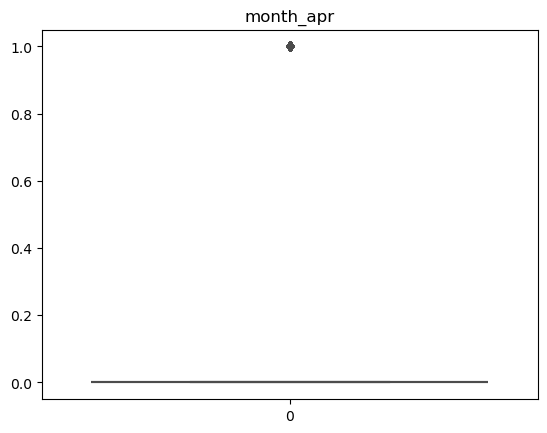

month_aug


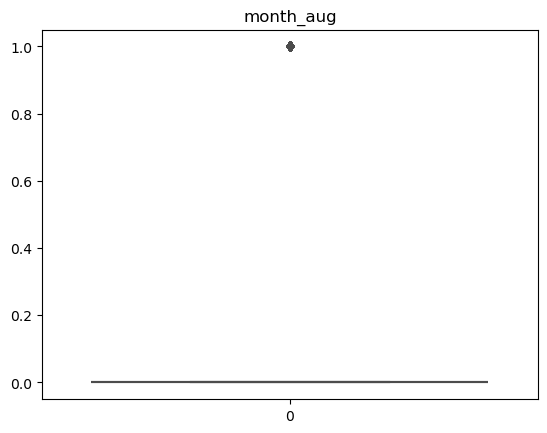

month_dec


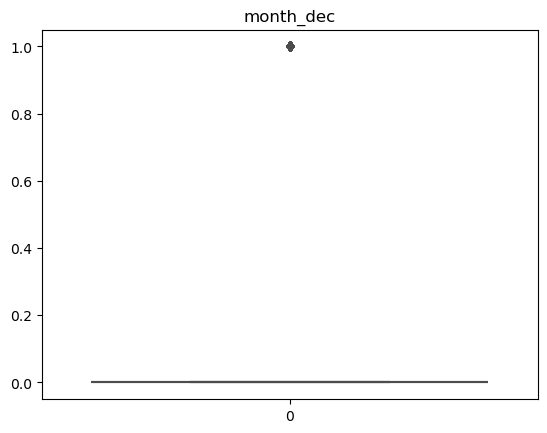

month_jul


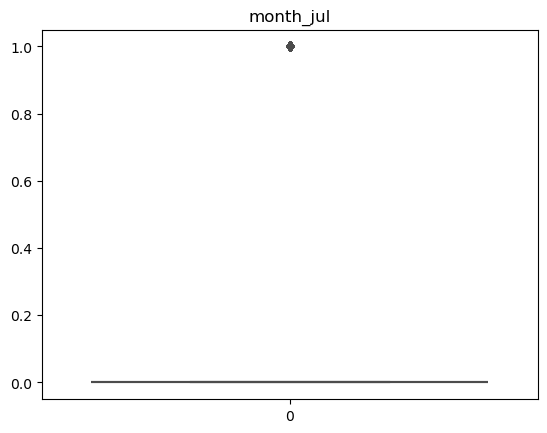

month_jun


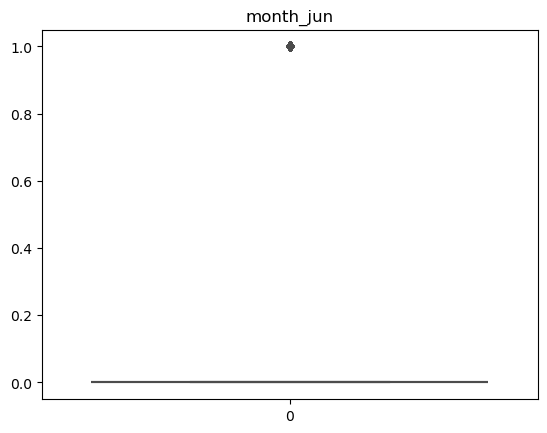

month_mar


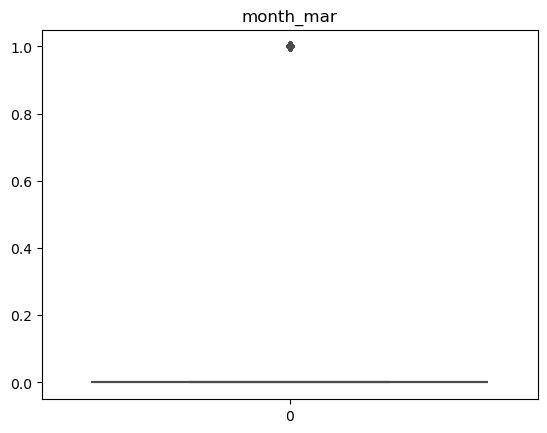

month_may


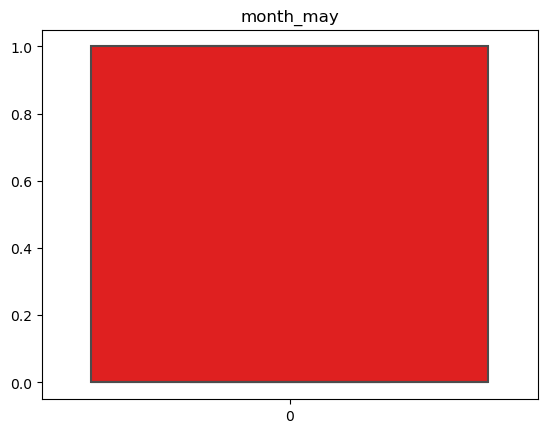

month_nov


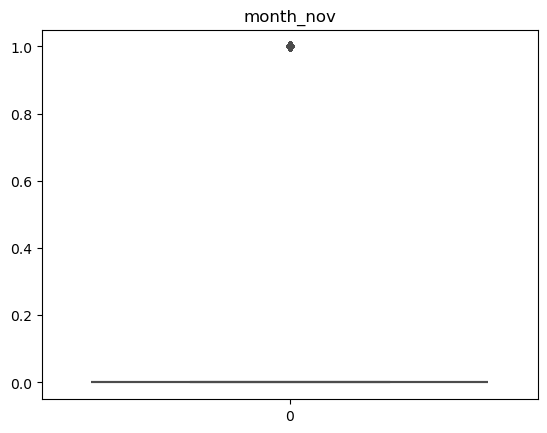

month_oct


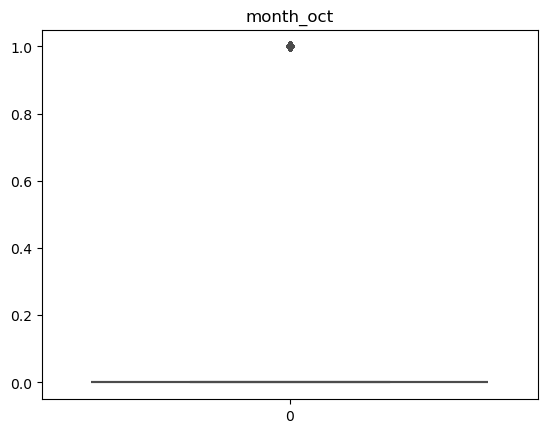

month_sep


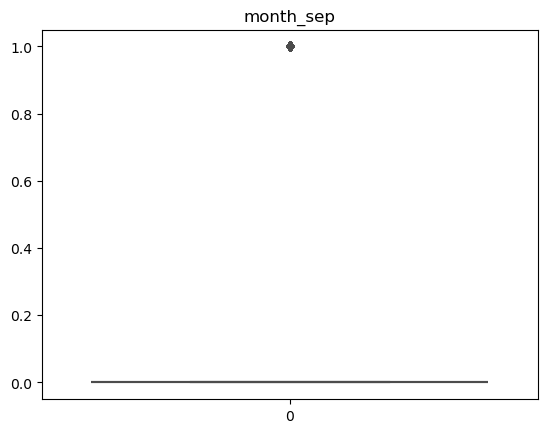

day_of_week_fri


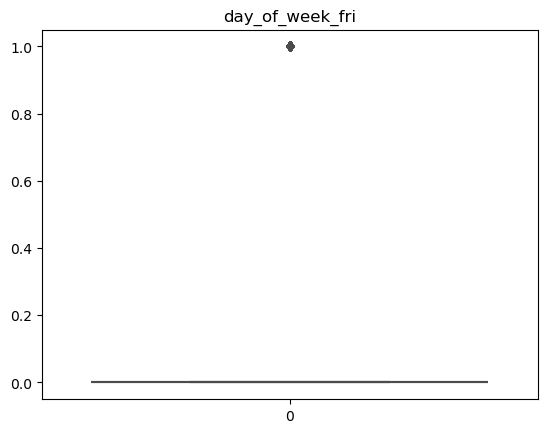

day_of_week_mon


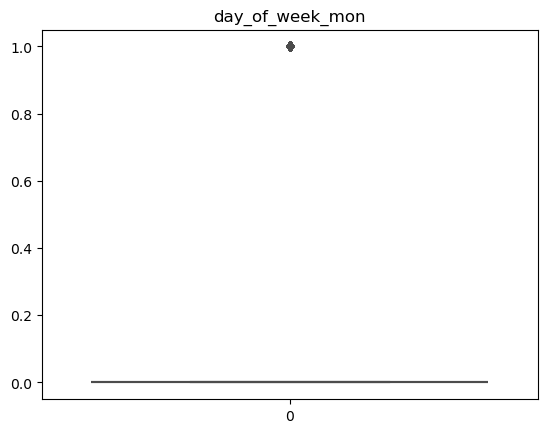

day_of_week_thu


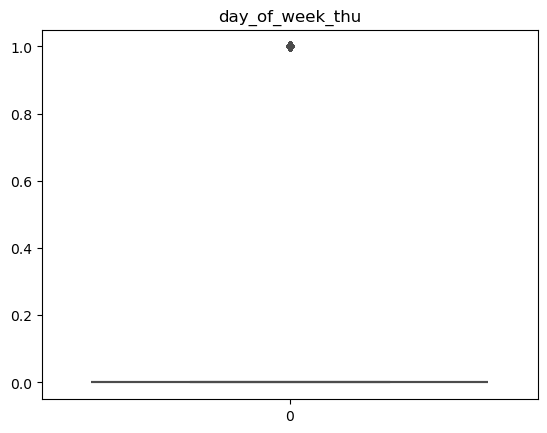

day_of_week_tue


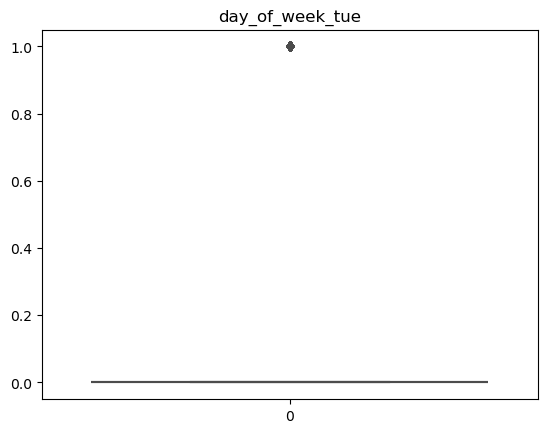

day_of_week_wed


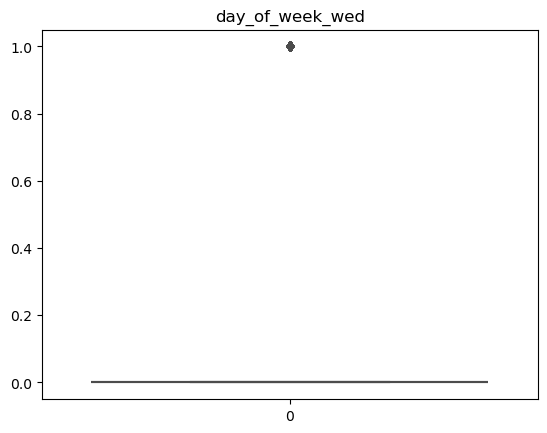

poutcome_failure


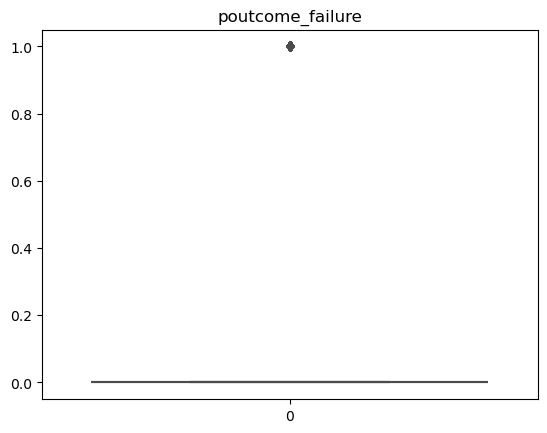

poutcome_nonexistent


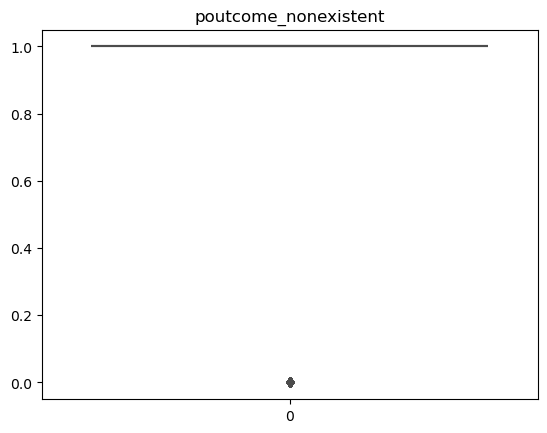

poutcome_success


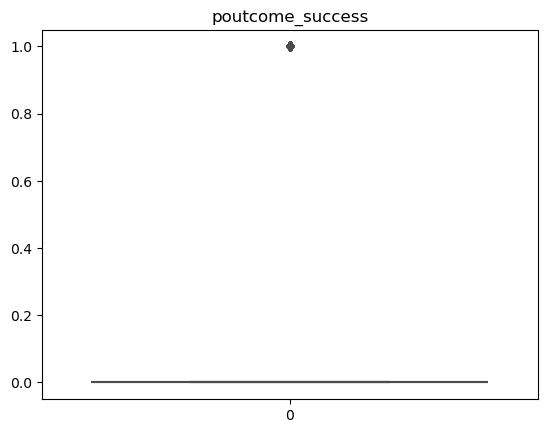

Loan_Status_label


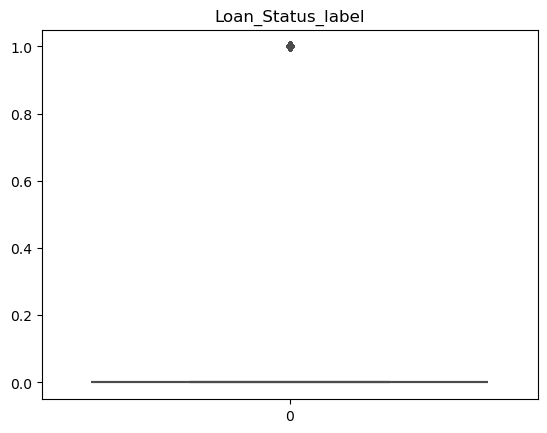

In [158]:
colors = np.random.choice(['r','g','m'])

for i in df:
    print(i)
    sn.boxplot(df[i], color = colors)
    plt.title(i)
    plt.show()

# Feature Selection 

In [45]:
df.corr()['Loan_Status_label']

age                              0.026865
campaign                        -0.074539
pdays                           -0.324611
previous                         0.228665
no_previous_contact             -0.324572
not_working                      0.118294
job_admin.                       0.035250
job_blue-collar                 -0.075625
job_entrepreneur                -0.019306
job_housemaid                   -0.007496
job_management                  -0.001627
job_retired                      0.091108
job_self-employed               -0.006224
job_services                    -0.033042
job_student                      0.092536
job_technician                  -0.003678
job_unemployed                   0.012016
job_unknown                     -0.002082
marital_divorced                -0.013390
marital_married                 -0.043307
marital_single                   0.056264
marital_unknown                  0.004679
education_basic.4y              -0.011243
education_basic.6y              -0

<Axes: >

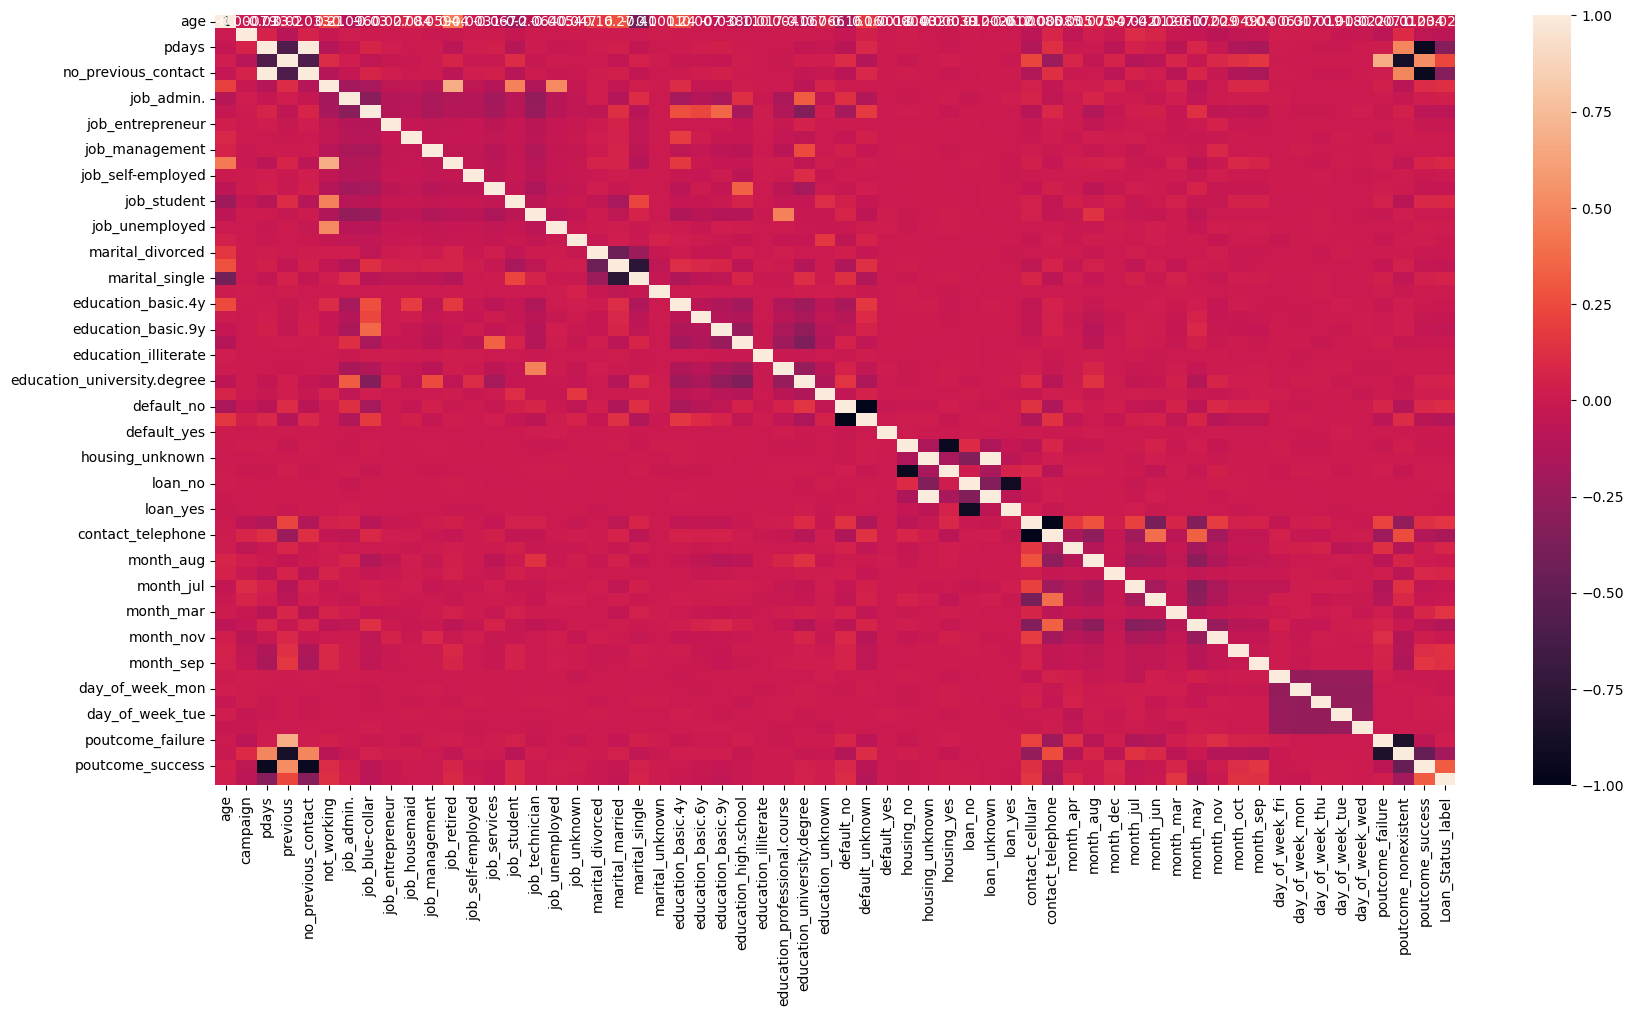

In [51]:
plt.figure(figsize=(20,10))
sn.heatmap(df.corr(), annot=True)

# Divide into Dependent and Independent data

In [54]:
df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon'

In [62]:
# indepedent
x = df.iloc[:,:-1]
x

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [64]:
# dependent
y = df['Loan_Status_label']
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: Loan_Status_label, Length: 38771, dtype: int64

# Train test Split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
x_train.shape

(31016, 59)

In [73]:
y_train.shape

(31016,)

In [71]:
x_test.shape

(7755, 59)

In [75]:
y_test.shape

(7755,)

# Model Selection and Building

## Logistic Regression

In [78]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [80]:
print('Training Accuracy:',lr.score(x_train,y_train))
print('Test Accuracy:', lr.score(x_test, y_test))

Training Accuracy: 0.8915720918235749
Test Accuracy: 0.8986460348162476


## Random Forest

In [84]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
print('Training Accuracy:',rf.score(x_train,y_train))
print('Test Accuracy:', rf.score(x_test, y_test)) #overfitting

Training Accuracy: 0.9936161980913077
Test Accuracy: 0.8836879432624114


### RF with hyperparameters

In [88]:
rf = RandomForestClassifier(max_depth=3)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3)

In [90]:
print('Training Accuracy:',rf.score(x_train,y_train))
print('Test Accuracy:', rf.score(x_test, y_test)) #overfitting

Training Accuracy: 0.8914431261284498
Test Accuracy: 0.8976144422952934


## Decision Tree

In [93]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
print('Training Accuracy:',dt.score(x_train,y_train))
print('Test Accuracy:', dt.score(x_test, y_test)) #overfitting

Training Accuracy: 0.9937129223626515
Test Accuracy: 0.8245003223726628


### DT with hyperparameters

In [99]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [101]:
print('Training Accuracy:',dt.score(x_train,y_train))
print('Test Accuracy:', dt.score(x_test, y_test)) #overfitting

Training Accuracy: 0.8913141604333248
Test Accuracy: 0.8990328820116054


## XGBoost

In [106]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [108]:
print('Training Accuracy:',xgb.score(x_train,y_train))
print('Test Accuracy:', xgb.score(x_test, y_test)) #slight overfitting

Training Accuracy: 0.9162367810162497
Test Accuracy: 0.8958091553836235


### XGB with Hyperparameters

In [123]:
xgb = XGBClassifier(gamma=1, reg_alpha=0.6, reg_lambda=0.1)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [125]:
print('Training Accuracy:',xgb.score(x_train,y_train))
print('Test Accuracy:', xgb.score(x_test, y_test)) #slight overfitting

Training Accuracy: 0.9019860717049265
Test Accuracy: 0.8964539007092198


## Here, we will choose Logistic Regression Algorithm to train our model

# Model Prediction

In [130]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [132]:
y_train[:5]

34767    0
32132    0
9868     0
20192    0
28805    1
Name: Loan_Status_label, dtype: int64

In [134]:
y_train_pred[:5]

array([0, 0, 0, 0, 0])

In [136]:
y_test[:5]

37815    0
5279     0
40810    0
3788     0
20910    0
Name: Loan_Status_label, dtype: int64

In [138]:
y_test_pred[:5]

array([0, 0, 0, 0, 0])

# Model Evaluation

In [143]:
# for training data
confusion_matrix(y_train,y_train_pred)

array([[26937,   348],
       [ 3015,   716]])

In [145]:
accuracy_score(y_train,y_train_pred)

0.8915720918235749

In [149]:
# For test data
confusion_matrix(y_test, y_test_pred)

array([[6820,   74],
       [ 712,  149]])

In [151]:
accuracy_score(y_test, y_test_pred)

0.8986460348162476

In [153]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6894
           1       0.67      0.17      0.27       861

    accuracy                           0.90      7755
   macro avg       0.79      0.58      0.61      7755
weighted avg       0.88      0.90      0.87      7755



In [ ]:
#-------------------------------------Project Ends here------------------------------------------------------------